In [1]:
!pip install scikit-learn


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [3]:
# Monthly sales data
dates = pd.date_range(start='2020-01-01', end='2023-12-01', freq='MS')
sales = [5000 + (i * 40) + (300 * ((i % 12) in [10, 11])) for i in range(len(dates))]

df = pd.DataFrame({'Date': dates, 'Sales': sales})
df['Month_Num'] = range(1, len(df)+1)  # Use as X feature
df.head()


,Date,Sales,Month_Num
0,2020-01-01,5000,1
1,2020-02-01,5040,2
2,2020-03-01,5080,3
3,2020-04-01,5120,4
4,2020-05-01,5160,5


In [4]:
# Features and target
X = df[['Month_Num']]
y = df['Sales']

# Train-test split
X_train, y_train = X[:-12], y[:-12]
X_test, y_test = X[-12:], y[-12:]

# Fit model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')


Mean Squared Error: 14496.84


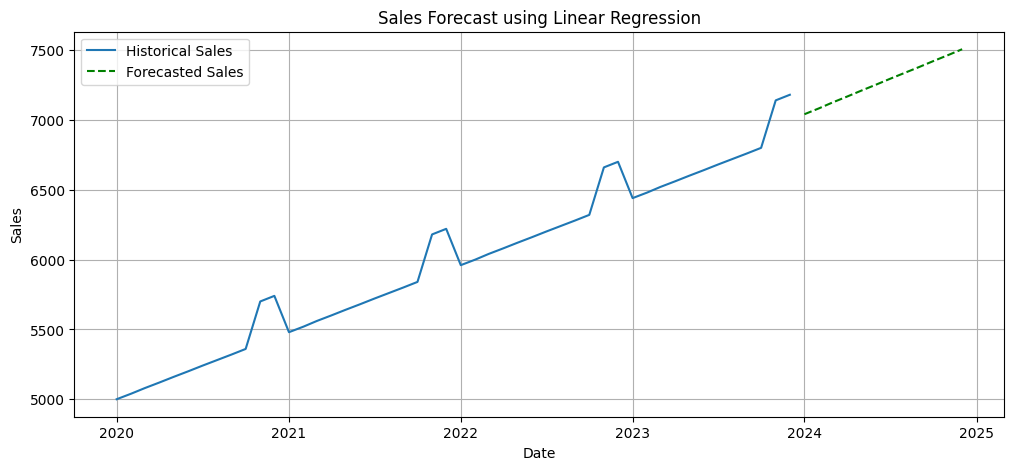

In [5]:
# Predict next 12 months
future_months = pd.DataFrame({'Month_Num': range(len(df)+1, len(df)+13)})
future_pred = model.predict(future_months)

# Create forecast dates
future_dates = pd.date_range(start='2024-01-01', periods=12, freq='MS')

# Plot
plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['Sales'], label='Historical Sales')
plt.plot(future_dates, future_pred, label='Forecasted Sales', color='green', linestyle='--')
plt.title("Sales Forecast using Linear Regression")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid()
plt.show()
